In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import folium
plt.style.use('ggplot')


In [8]:
df = pd.read_csv('../.gitignore/PPP_data_to_150k.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91018 entries, 0 to 91017
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LoanAmount     91018 non-null  float64
 1   City           91017 non-null  object 
 2   State          91018 non-null  object 
 3   Zip            91017 non-null  float64
 4   NAICSCode      88767 non-null  float64
 5   BusinessType   90949 non-null  object 
 6   RaceEthnicity  91018 non-null  object 
 7   Gender         91018 non-null  object 
 8   Veteran        91018 non-null  object 
 9   NonProfit      3016 non-null   object 
 10  JobsRetained   82822 non-null  float64
 11  DateApproved   91018 non-null  object 
 12  Lender         91018 non-null  object 
 13  CD             91018 non-null  object 
dtypes: float64(4), object(10)
memory usage: 9.7+ MB


,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
0,149995.0,PARKER,CO,80134.0,541618.0,Subchapter S Corporation,White,Unanswered,Unanswered,NaN,9.0,04/29/2020,"Harvest Small Business Finance, LLC",CO - 04
1,149947.0,SNOWMASS VLG,CO,81615.0,NaN,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,11.0,05/03/2020,"U.S. Bank, National Association",CO - 03
2,149945.0,DENVER,CO,80221.0,221115.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,19.0,04/28/2020,Customers Bank,CO - 01
3,149925.0,MONUMENT,CO,80132.0,541940.0,Corporation,Unanswered,Female Owned,Non-Veteran,NaN,15.0,04/07/2020,Integrity Bank & Trust,CO - 04
4,149900.0,DENVER,CO,80230.0,484121.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,9.0,04/29/2020,Colorado Enterprise Fund,CO - 01


In [17]:
df2 = df[~df.RaceEthnicity.str.contains("Unanswered")]


In [18]:
ethnicities = df2['RaceEthnicity'].unique()
# ethnicities[3] = 'American Indian \n or Alaska Native'
# ethnicities[4] = 'Black or \n African American'
ethnicities

array(['White', 'Hispanic', 'American Indian or Alaska Native', 'Asian',
       'Black or African American', 'Puerto Rican'], dtype=object)

In [19]:
def split_ethnicities(ethnicities):
    dataframes = [df_with_counties[df_with_counties['RaceEthnicity'] == name] for name in ethnicities]
    return dataframes


In [20]:
white_df, hispanic_df, am_indian_alaska_df, asian_df, black_df, puerto_rican_df = split_ethnicities(ethnicities)
asian_df

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,zip,type,county,latitude,longitude
3,116800.00,PARKER,CO,80134.0,722511.0,Limited Liability Company(LLC),Asian,Male Owned,Non-Veteran,NaN,0.0,04/10/2020,"Community Banks of Colorado, A Division of",CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
11,79666.15,PARKER,CO,80134.0,621210.0,Corporation,Asian,Female Owned,Unanswered,NaN,11.0,04/10/2020,TCF National Bank,CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
14,60200.00,PARKER,CO,80134.0,722513.0,Corporation,Asian,Male Owned,Non-Veteran,NaN,13.0,04/07/2020,FirstBank,CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
23,49000.00,PARKER,CO,80134.0,445310.0,Limited Liability Company(LLC),Asian,Female Owned,Non-Veteran,NaN,13.0,04/07/2020,Hanmi Bank,CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
25,45800.00,PARKER,CO,80134.0,541511.0,Subchapter S Corporation,Asian,Male Owned,Non-Veteran,NaN,4.0,06/23/2020,"Zions Bank, A Division of",CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,20800.00,HOLLY,CO,81047.0,722513.0,Limited Liability Company(LLC),Asian,Unanswered,Unanswered,NaN,4.0,04/11/2020,Mountain America FCU,CO - 04,81047,STANDARD,Prowers County,38.05,-102.12
6696,17235.00,FLORENCE,CO,81226.0,722511.0,Limited Liability Company(LLC),Asian,Male Owned,Non-Veteran,NaN,5.0,05/28/2020,Rocky Mountain Bank and Trust,CO - 03,81226,STANDARD,Fremont County,38.38,-105.11
6704,19000.00,FORT COLLINS,CO,80256.0,325612.0,Corporation,Asian,Male Owned,Non-Veteran,NaN,6.0,04/11/2020,FirstBank,CO - 01,80256,UNIQUE,Denver County,39.76,-104.87
6708,16200.00,FIRESTONE,CO,80520.0,531390.0,Corporation,Asian,Male Owned,Non-Veteran,NaN,2.0,04/15/2020,Adams Bank & Trust,CO - 04,80520,PO BOX,Weld County,40.11,-104.93


In [21]:
ethnicity_dfs = [white_df, hispanic_df, am_indian_alaska_df, asian_df, black_df, puerto_rican_df]


In [22]:
chart_colors = ['#003f5c', '#bc5090','#58508d', '#dd5182','#ff6361', '#ffa600']

In [23]:
# average loan amount for each ethnicity
def avg_loan_by_ethnicity(ethnicities, ethnicity_dfs):
    '''
    Computes average loan amount for each dataframe in inputted list.

    Returns: Dictionary of averages for each ethnicity in the form of ethnicity:average
    '''
    avg_loan = {eth:round(df['LoanAmount'].mean(),2) for eth, df in zip(ethnicities, ethnicity_dfs)}
    return avg_loan
ethnicity_avg_loan = avg_loan_by_ethnicity(ethnicities, ethnicity_dfs)
ethnicity_avg_loan


{'White': 46419.63,
 'Hispanic': 35137.54,
 'American Indian or Alaska Native': 45856.46,
 'Asian': 41364.28,
 'Black or African American': 29041.72,
 'Puerto Rican': 4375.0}

In [24]:
# average loan amount for each ethnicity
def avg_loan_by_ethnicity(ethnicities, ethnicity_dfs):
    '''
    Computes average loan amount for each dataframe in inputted list.

    Returns: Dictionary of averages for each ethnicity in the form of ethnicity:average
    '''
    avg_loan = {eth:round(df['LoanAmount'].mean(),2) for eth, df in zip(ethnicities, ethnicity_dfs)}
    return avg_loan
ethnicity_avg_loan = avg_loan_by_ethnicity(ethnicities, ethnicity_dfs)
ethnicity_avg_loan


{'White': 46419.63,
 'Hispanic': 35137.54,
 'American Indian or Alaska Native': 45856.46,
 'Asian': 41364.28,
 'Black or African American': 29041.72,
 'Puerto Rican': 4375.0}

In [25]:
ethnicity_avg_loans = [white_avg, hispanic_avg, am_indian_alaska_avg, asian_avg, black_avg, puerto_rican_avg]


NameError: name 'white_avg' is not defined

In [26]:
#graph loan amounts 
def average_loan_ethnicity(ethnicity_avg_loan, chart_colors, save_loc):
    fig, ax = plt.subplots(1, figsize=(12,4), dpi=700)
    keys = ethnicity_avg_loan.keys()
    averages = ethnicity_avg_loan.values()
    bar = ax.bar(keys, averages)
    for i in range(len(ethnicity_avg_loan)):
        bar[i].set_color(chart_colors[i])
    plt.xticks(rotation=45, fontsize=12, horizontalalignment='right')
    ax.set_xlabel('Ethnicity', fontsize= 16)
    ax.set_ylabel('Average Loan Amount in $', fontsize= 16)
    ax.set_title('Average Loan Amount by Ethnicity in Colorado', fontsize=18)
    
    plt.savefig(save_loc, bbox_inches='tight')
    

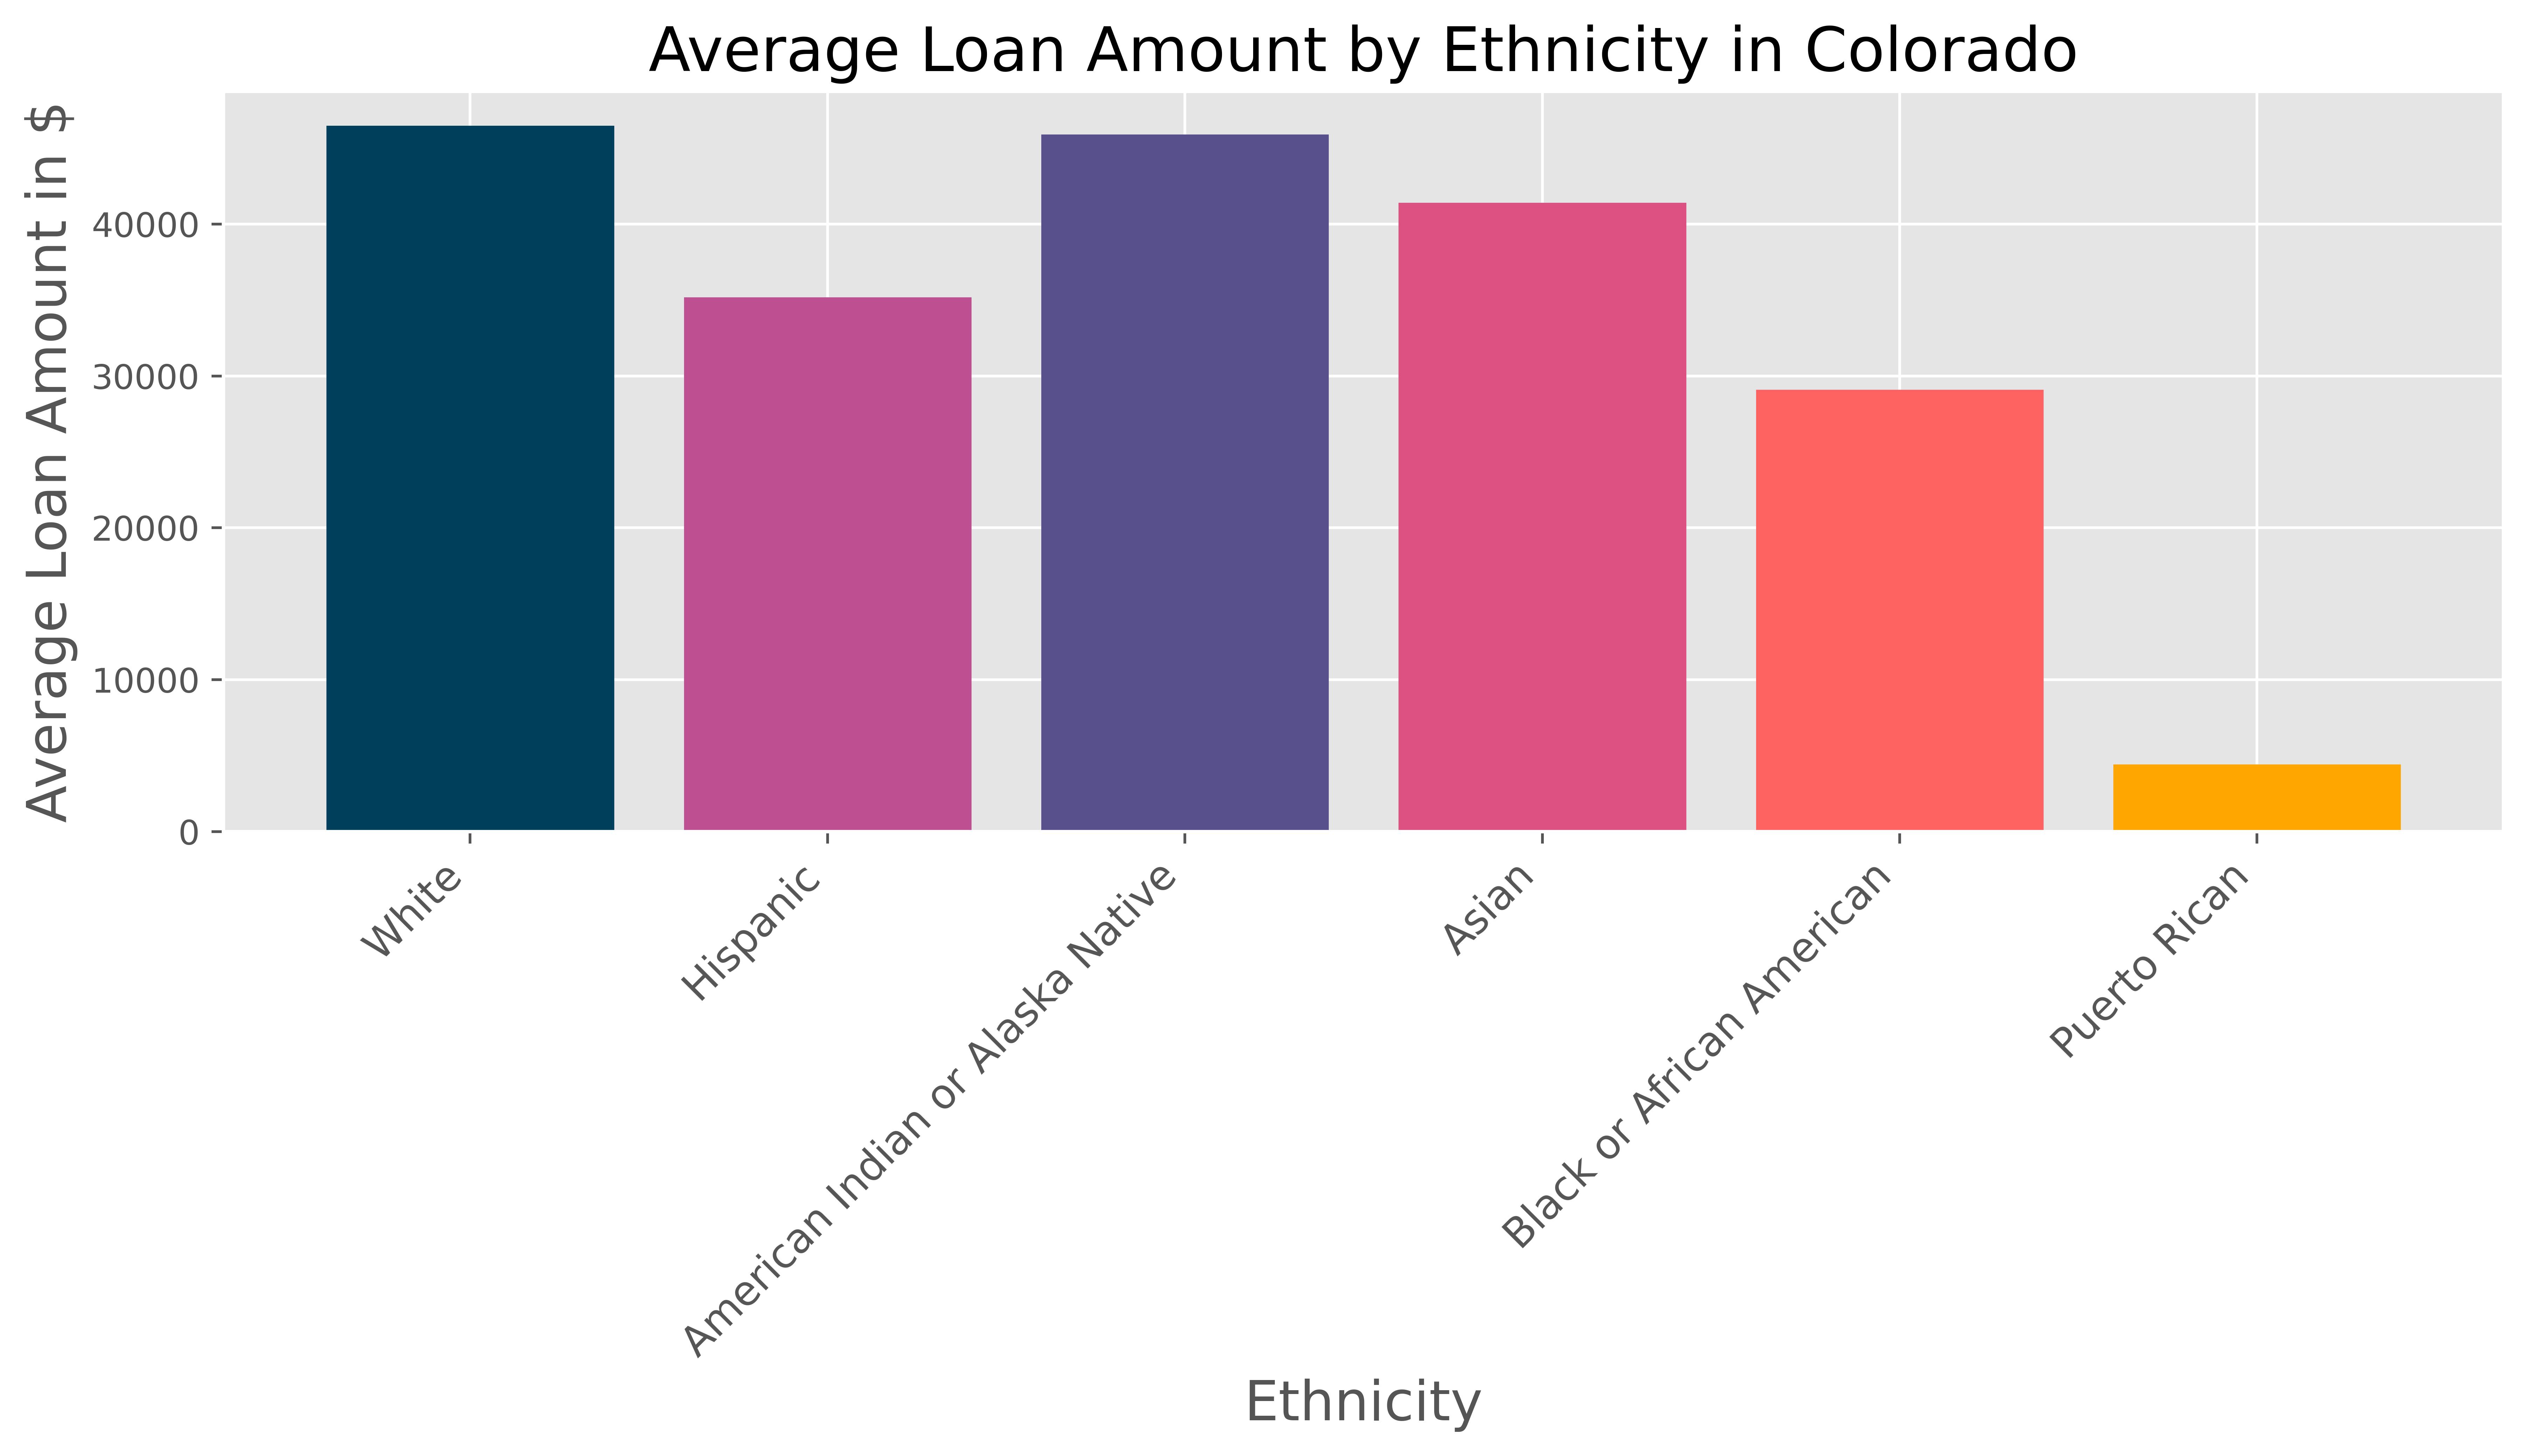

In [27]:
average_loan_ethnicity(ethnicity_avg_loan, chart_colors, '../images/avg_loan_ethnicity.png')


In [28]:
count_zips = white_df.groupby(['Zip']).count()['LoanAmount']
count_zips.sort_values(ascending=False).head(5)

Zip
80525.0    97
80487.0    93
80524.0    86
80112.0    76
81625.0    73
Name: LoanAmount, dtype: int64

In [29]:
#top zip codes for each ethnicity
def top_zip(ethnicity_dfs, ethnicities):
    top_dict = {}
    for eth, df in zip(ethnicities, ethnicity_dfs):
        df['Zip'] = df['Zip'].astype(int)
        count_zips = df.groupby(['Zip'])['LoanAmount'].count()
        #count_zips['Zip'].astype(int)
        sort_zip = count_zips.sort_values(ascending=False).head(5)
        top_dict[eth]= sort_zip
        
    return top_dict

top_zips = top_zip(ethnicity_dfs, ethnicities)
top_zips

/Users/jenniferoshea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


{'White': Zip
 80525    97
 80487    93
 80524    86
 80112    76
 81625    73
 Name: LoanAmount, dtype: int64,
 'Hispanic': Zip
 81101    35
 80918    24
 80907    22
 80903    18
 80904    17
 Name: LoanAmount, dtype: int64,
 'American Indian or Alaska Native': Zip
 80211    3
 80221    2
 80023    2
 80134    2
 80206    2
 Name: LoanAmount, dtype: int64,
 'Asian': Zip
 81101    13
 80111    12
 80014    11
 81008    10
 80027    10
 Name: LoanAmount, dtype: int64,
 'Black or African American': Zip
 80012    6
 80220    6
 80224    3
 80017    3
 80205    3
 Name: LoanAmount, dtype: int64,
 'Puerto Rican': Zip
 80203    1
 Name: LoanAmount, dtype: int64}

In [30]:
zips.columns

NameError: name 'zips' is not defined

In [31]:
#graph top zips

zips

NameError: name 'zips' is not defined

In [32]:
zips = pd.DataFrame(top_zips)
zips.fillna(0, inplace=True)
zips['total'] = zips['White'] + zips['American Indian or Alaska Native'] + zips['Asian'] + zips['Black or African American']+ zips['Puerto Rican'] + zips['Hispanic']
zips = pd.DataFrame(zips).sort_values('total')    
zips.drop('total', axis=1,inplace=True)


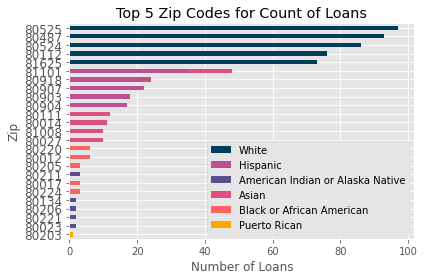

In [33]:
ax = zips.plot(kind='barh', stacked=True, color=chart_colors)
plt.yticks(fontsize = 12)
ax.set_xlabel('Number of Loans')
ax.set_title('Top 5 Zip Codes for Count of Loans')
plt.savefig('../images/top_zip_loancount.png')
plt.tight_layout()
plt.show()

In [34]:
numloansSeries = df2.groupby('Zip').count().LoanAmount
COMap = folium.Map(location=[39.5501,-105.7821], tiles='Stamen Toner', zoom_start=6.5)
COMap

In [35]:
#group the dataframe by zip code and count the number of stores in each zip code
numloansSeries = df2.groupby('Zip').count().LoanAmount
#initialize an empty dataframe to store this new data
numloansByZip = pd.DataFrame()
#populate the new dataframe with a 'zipcode' column and a 'numStores' column
numloansByZip['zipcode'] = [str(i) for i in numloansSeries.index]
numloansByZip['numloans'] = numloansSeries.values

#initialize the Colorado Zipcode map
COMap = folium.Map(location=[39.5501,-105.7821], tiles='Stamen Toner', zoom_start=6.5)

# state_geo = 
#draw the choropleth map. These are the key components:
#--geo_path: the geojson which you want to draw on the map [in our case it is the zipcodes in LA County]

#--data: the pandas dataframe which contains the zipcode information 
# AND the values of the variable you want to plot on the choropleth

#--columns: the columns from the dataframe that you want to use 
#[this should include a geospatial column [zipcode] and a variable [numStores]

#--key_on: the common key between one of your columns and an attribute in the geojson. 
#This is how python knows which dataframe row matches up to which zipcode in the geojson

COMap.choropleth(data=numloansByZip, geo_data='../data/Co.geojson', columns=['zipcode', 'numloans'], \
                 key_on='feature.zipcode', fill_color='YlGn', fill_opacity=1)

#laMap.save('laChoropleth.html')

/Users/jenniferoshea/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


ValueError: key_on `'zipcode'` not found in GeoJSON.

In [ ]:
df2[df2['Zip'] == 69128.0]
df2.drop([71479],axis=0, inplace=True)


In [36]:
df2[df2['Zip'] == 69128.0]

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD
71479,8536.45,BUSHNELL,CO,69128.0,111140.0,Sole Proprietorship,White,Male Owned,Unanswered,NaN,1.0,05/27/2020,FirsTier Bank,CO - 03


In [37]:
top_10_loan_zip = df2.groupby(['Zip']).sum()['LoanAmount'].sort_values(ascending=False).head(10)

In [38]:
keys = top_10_avg_loan.index.tolist()
keys_int = [int(x) for x in keys]
keys_as_str = [str(x) for x in keys]
height = top_5_avg_loan.values.tolist()
width = 0.35

fig, ax = plt.subplots(1, figsize=(12,4), dpi=300)
ax.bar(keys_as_str, height, width=width, color='#003f5c')
ax.set_xlabel('Zip Code', fontsize=14)
ax.set_ylabel('Loan Amount in $', fontsize = 14)
ax.set_title('Top 5 Zipcodes with Highest Loan Amount', fontsize=18)

NameError: name 'top_10_avg_loan' is not defined

In [39]:
top_10_avg_loan = df2.groupby(['Zip', 'RaceEthnicity']).mean()['LoanAmount'].sort_values(ascending=False).head(10)
top_10_avg_loan

Zip      RaceEthnicity
80902.0  White            143600.00
81524.0  White            139100.00
80440.0  White            137271.00
80137.0  White            135672.50
80513.0  Hispanic         134300.00
80603.0  Asian            131217.92
80006.0  White            128600.00
81137.0  White            128197.50
80433.0  Hispanic         123700.00
81413.0  White            122700.00
Name: LoanAmount, dtype: float64

In [40]:

top_dfs = [df2[df2['Zip']==x] for x in keys]
top_dfs[0]

NameError: name 'keys' is not defined

In [41]:
counties = pd.read_csv('../data/zip_code_database.csv')
#filter zip code database for Colorado, drop unnecessary columns
co_counties = counties[counties['state']=='CO']
co_counties.drop(['decommissioned', 'acceptable_cities', 'unacceptable_cities','timezone','area_codes','world_region','country','irs_estimated_population_2015','primary_city','state'],axis=1,inplace=True)

#merge counties onto dataframe 
df_with_counties = pd.merge(df2,co_counties, left_on='Zip', right_on='zip')
df_with_counties

/Users/jenniferoshea/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsRetained,DateApproved,Lender,CD,zip,type,county,latitude,longitude
0,149995.00,PARKER,CO,80134.0,541618.0,Subchapter S Corporation,White,Unanswered,Unanswered,NaN,9.0,04/29/2020,"Harvest Small Business Finance, LLC",CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
1,149000.00,PARKER,CO,80134.0,812199.0,Subchapter S Corporation,White,Male Owned,Non-Veteran,NaN,0.0,06/02/2020,FirstBank,CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
2,146229.00,PARKER,CO,80134.0,238990.0,Limited Liability Company(LLC),White,Male Owned,Non-Veteran,NaN,7.0,06/30/2020,"U.S. Bank, National Association",CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
3,116800.00,PARKER,CO,80134.0,722511.0,Limited Liability Company(LLC),Asian,Male Owned,Non-Veteran,NaN,0.0,04/10/2020,"Community Banks of Colorado, A Division of",CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
4,114500.00,PARKER,CO,80134.0,541320.0,Corporation,White,Female Owned,Non-Veteran,NaN,13.0,04/08/2020,FirstBank,CO - 04,80134,STANDARD,Douglas County,39.50,-104.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,2748.55,WOODROW,CO,80757.0,484121.0,Sole Proprietorship,White,Unanswered,Unanswered,NaN,1.0,04/14/2020,Star Tech FCU,CO - 04,80757,STANDARD,Washington County,39.98,-103.58
6766,2340.00,SEIBERT,CO,80834.0,812990.0,Sole Proprietorship,White,Female Owned,Unanswered,NaN,1.0,05/29/2020,Frontier Bank,CO - 04,80834,STANDARD,Kit Carson County,39.29,-102.86
6767,1425.00,EVERGREEN,CO,80437.0,541410.0,Limited Liability Company(LLC),White,Male Owned,Non-Veteran,NaN,1.0,04/09/2020,Evergreen National Bank,CO - 06,80437,PO BOX,Jefferson County,39.63,-105.34
6768,1311.02,AUSTIN,CO,81410.0,238910.0,Corporation,Hispanic,Unanswered,Unanswered,NaN,NaN,04/14/2020,First Colorado National Bank,CO - 03,81410,STANDARD,Delta County,38.80,-107.97


In [42]:
def top_county(ethnicity_dfs, ethnicities):
    '''
    Counts the number of loans for each Ethnicity group, sorts by top 5.

    Returns: Dictionary where Keys are the Ethnicities and values are a dataframe of top 5
    zipcodes and the count of loans from each zip.
    '''
    top_dict = {}
    for eth, df in zip(ethnicities, ethnicity_dfs):
        count_counties = df.groupby(['county']).count()['LoanAmount']
        sort_counties = count_counties.sort_values(ascending=False).head(5)
        top_dict[eth]= sort_counties
    return top_dict

top_county = top_county(ethnicity_dfs, ethnicities)
top_county

{'White': county
 Denver County       578
 El Paso County      547
 Jefferson County    465
 Larimer County      443
 Arapahoe County     342
 Name: LoanAmount, dtype: int64,
 'Hispanic': county
 El Paso County      232
 Denver County       145
 Jefferson County    104
 Arapahoe County      93
 Adams County         56
 Name: LoanAmount, dtype: int64,
 'American Indian or Alaska Native': county
 Douglas County      6
 Denver County       6
 Weld County         4
 Jefferson County    4
 Arapahoe County     3
 Name: LoanAmount, dtype: int64,
 'Asian': county
 Denver County       101
 Arapahoe County      85
 El Paso County       75
 Jefferson County     68
 Adams County         51
 Name: LoanAmount, dtype: int64,
 'Black or African American': county
 Denver County       36
 Arapahoe County     24
 El Paso County      12
 Jefferson County    10
 Adams County         9
 Name: LoanAmount, dtype: int64,
 'Puerto Rican': county
 Denver County    1
 Name: LoanAmount, dtype: int64}

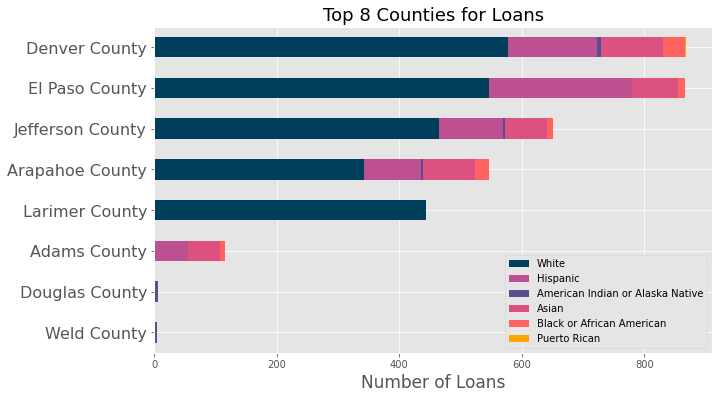

In [43]:
#top county bar chart
def graph_top_counties(top_county, chart_colors, saveloc):
    counties = pd.DataFrame(top_county)
    counties.fillna(0, inplace=True)
    counties['total'] = counties['White'] + counties['American Indian or Alaska Native'] + counties['Asian'] + counties['Black or African American']+ counties['Puerto Rican'] + counties['Hispanic']
    counties = pd.DataFrame(counties).sort_values('total')    
    counties.drop('total', axis=1,inplace=True)
    
    
    ax = counties.plot(kind='barh', stacked=True, color=chart_colors,figsize=(10,6))
    plt.yticks(fontsize = 16)
    ax.set_xlabel('Number of Loans', fontsize=17)
    ax.set_title('Top 8 Counties for Loans', fontsize=18)
    plt.savefig(saveloc, bbox_inches='tight')

graph_top_counties(top_county, chart_colors, '../images/top_county_loancount.png')

In [44]:
demographics = pd.read_csv('../data/counties.csv')
demographics_18 = demographics[demographics['YEAR']==2018]
demographics_18 = demographics_18.iloc[:,:11]
demographics_18.columns

Index(['CTYNAME', 'YEAR', 'TOT_POP', 'Not Hisp pop', 'NH Whites', 'NH Afr Am',
       'NH Am Indian/Native', 'NH Asian', 'NH Native Hawaiian/other',
       'NH Two or more', 'Hispanic'],
      dtype='object')

In [45]:
#overall colorado demographics by ethnicity
demographic_eth_cols = ['NH Whites','Hispanic','NH Am Indian/Native','NH Asian','NH Afr Am']
total_demographics = [sum(demographics_18[x]) for x in demographic_eth_cols]
other = sum(demographics_18['NH Two or more']) + sum(demographics_18['NH Native Hawaiian/other'])
total_demographics.append(other)
total_demographics

[3868329, 1235117, 36614, 187668, 229085, 138751]

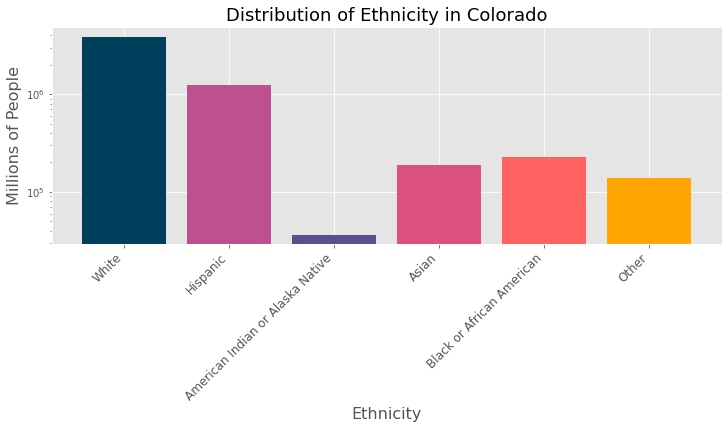

In [46]:
def graph_demographics(total_demographics, ethnicities, saveloc):
    fig, ax = plt.subplots(1,figsize=(12,4))
    ethnicities_dem = ethnicities[:-1]
    ethnicities_dem=np.append(ethnicities_dem, 'Other')
    plt.bar(ethnicities_dem, total_demographics, color=chart_colors)
    plt.xticks(rotation=45, fontsize=12, horizontalalignment='right')
    ax.set_yscale('log')
    ax.set_xlabel('Ethnicity', fontsize=16)
    ax.set_ylabel('Millions of People', fontsize=16)
    ax.set_title('Distribution of Ethnicity in Colorado', fontsize=18)
    plt.savefig(saveloc, bbox_inches='tight')

graph_demographics(total_demographics, ethnicities, '../images/demographics.png')

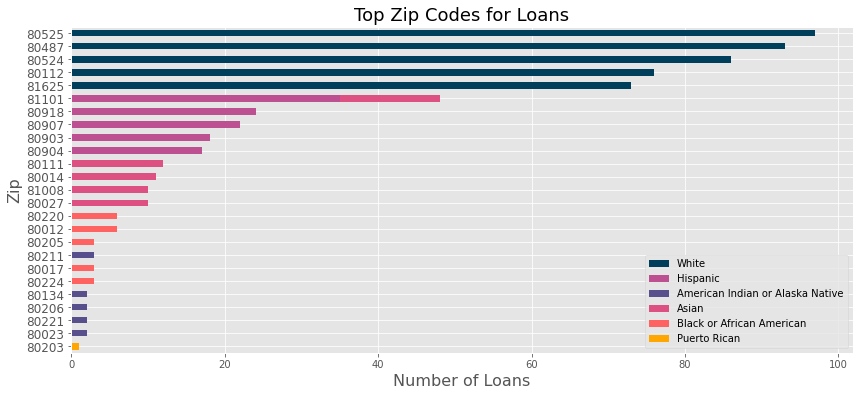

In [47]:
def graph_top_zips(top_zips, chart_colors, saveloc):
    zips = pd.DataFrame(top_zips)
    zips.fillna(0, inplace=True)
    zips['total'] = zips['White'] + zips['American Indian or Alaska Native'] + zips['Asian'] + zips['Black or African American']+ zips['Puerto Rican'] + zips['Hispanic']
    zips = pd.DataFrame(zips).sort_values('total')    
    zips.drop('total', axis=1,inplace=True)

    ax = zips.plot(kind='barh', stacked=True, color=chart_colors,figsize=(14,6))
    plt.yticks(fontsize = 12)
    ax.set_xlabel('Number of Loans', fontsize=16)
    ax.set_ylabel('Zip',fontsize=16)
    ax.set_title('Top Zip Codes for Loans', fontsize=18)
    plt.savefig(saveloc, bbox_inches='tight')

graph_top_zips(top_zips, chart_colors, '../images/top_zip_loancount.png')

In [48]:
#demographics by county
top_counties_loans= ['Denver County', 'El Paso County', 'Jefferson County','Arapahoe County','Larimer County','Adams County','Douglas County','Weld County']
county_rows = [demographics_18[demographics_18['CTYNAME'] == x] for x in top_counties_loans]

#iterate through list of counties and pull out populations for each ethnicity
demographics_by_county =[]
for i in range(len(county_rows)):
    county_list = []
    for eth in demographic_eth_cols:
        county_list.append(int(county_rows[i][eth].values))
    
    other = county_rows[i]['NH Two or more'].values + county_rows[i]['NH Native Hawaiian/other'].values
    county_list.append(int(other))
    demographics_by_county.append(county_list)
county_rows

[           CTYNAME  YEAR  TOT_POP  Not Hisp pop  NH Whites  NH Afr Am  \
 152  Denver County  2018   716492        503930     390336      64126   
 
      NH Am Indian/Native  NH Asian  NH Native Hawaiian/other  NH Two or more  \
 152                 3650     28033                       981           16804   
 
      Hispanic  
 152    212562  ,
             CTYNAME  YEAR  TOT_POP  Not Hisp pop  NH Whites  NH Afr Am  \
 197  El Paso County  2018   713856        589234     491494      43321   
 
      NH Am Indian/Native  NH Asian  NH Native Hawaiian/other  NH Two or more  \
 197                 4465     20872                      2116           26966   
 
      Hispanic  
 197    124622  ,
               CTYNAME  YEAR  TOT_POP  Not Hisp pop  NH Whites  NH Afr Am  \
 278  Jefferson County  2018   580233        490344     452555       6637   
 
      NH Am Indian/Native  NH Asian  NH Native Hawaiian/other  NH Two or more  \
 278                 2989     16896                       473  

In [49]:
def top_county_sum(ethnicity_dfs, ethnicities):
    '''
    Counts the number of loans for each Ethnicity group, sorts by top 5.

    Returns: Dictionary where Keys are the Ethnicities and values are a dataframe of top 5
    zipcodes and the count of loans from each zip.
    '''
    top_dict = {}
    for eth, df in zip(ethnicities, ethnicity_dfs):
        count_counties = df.groupby(['county']).sum()['LoanAmount']
        sort_counties = count_counties.sort_values(ascending=False).head(5)
        top_dict[eth]= sort_counties
    return top_dict

top_county_sum = top_county_sum(ethnicity_dfs, ethnicities)


#top county bar chart
def graph_top_counties(top_county, chart_colors, saveloc):
    counties = pd.DataFrame(top_county)
    counties.fillna(0, inplace=True)
    counties['total'] = counties['White'] + counties['American Indian or Alaska Native'] + counties['Asian'] + counties['Black or African American']+ counties['Puerto Rican'] + counties['Hispanic']
    counties = pd.DataFrame(counties).sort_values('total')    
    counties.drop('total', axis=1,inplace=True)
    
    
    ax = counties.plot(kind='barh', stacked=True, color=chart_colors,figsize=(10,6))
    plt.yticks(fontsize = 16)
    ax.set_xlabel('Loan Amount in USD', fontsize=17)
    ax.set_title('Top 8 Counties for Loans', fontsize=18)
    plt.savefig(saveloc, bbox_inches='tight')

#graph_top_counties(top_county_sum, chart_colors, '../images/top_county_loansum.png')
top_county_sum

{'White': county
 Denver County       29294462.85
 El Paso County      27837146.80
 Jefferson County    23592787.60
 Larimer County      22237030.70
 Arapahoe County     18089401.00
 Name: LoanAmount, dtype: float64,
 'Hispanic': county
 El Paso County      6534516.65
 Denver County       5069485.96
 Arapahoe County     3683754.85
 Jefferson County    2866121.38
 Adams County        2313645.22
 Name: LoanAmount, dtype: float64,
 'American Indian or Alaska Native': county
 Denver County       416658.85
 Jefferson County    250860.50
 Arapahoe County     181260.72
 Weld County         169167.50
 Douglas County      149739.00
 Name: LoanAmount, dtype: float64,
 'Asian': county
 Denver County       4425066.91
 Arapahoe County     3632789.20
 El Paso County      3070918.46
 Jefferson County    2879645.35
 Douglas County      1579845.32
 Name: LoanAmount, dtype: float64,
 'Black or African American': county
 Denver County       914707.50
 Arapahoe County     621152.50
 El Paso County      38

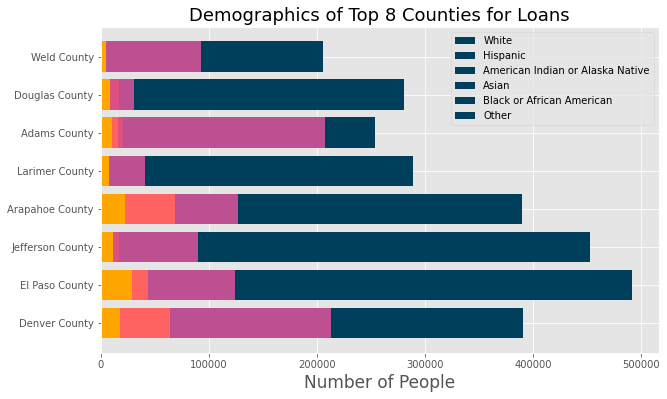

In [50]:

#top county bar chart
def graph_top_county_demographics(demographics_by_county, ethnicities, top_counties_loans, chart_colors, saveloc):
    ethnicities_dem = ethnicities[:-1]
    ethnicities_dem=np.append(ethnicities_dem, 'Other')
    fig, ax = plt.subplots(1,figsize=(10,6))
    for x in range(len(demographics_by_county)):
        plt.barh(top_counties_loans[x], demographics_by_county[x], label=top_counties_loans[x], color=chart_colors)
        
    ax.set_xlabel('Number of People', fontsize=17)
    ax.set_title('Demographics of Top 8 Counties for Loans', fontsize=18)
    plt.legend(ethnicities_dem)
    plt.savefig(saveloc, bbox_inches='tight')

graph_top_county_demographics(demographics_by_county, ethnicities, top_counties_loans, chart_colors, '../images/top_county_loancount_demographic.png')

In [51]:
## avg amount of loan compared to jobs retained by ethnicity
avg_loan_by_ethnicity = [round(x['LoanAmount'].mean(),2) for x in ethnicity_dfs]
avg_jobs_retained_by_ethnicity = [round(x['JobsRetained'].mean(),3) for x in ethnicity_dfs]

def zip_lists(list1,list2):
    zipped = [(x,y) for x,y in zip(list1, list2)]
    return zipped
avg_jobs_loans = zip_lists(avg_jobs_retained_by_ethnicity, avg_loan_by_ethnicity)
avg_jobs_loans

[(6.305, 46419.63),
 (5.946, 35137.54),
 (7.882, 45856.46),
 (7.915, 41364.28),
 (5.337, 29041.72),
 (1.0, 4375.0)]

In [95]:
ethnicity_dfs_job_comparison = [x.dropna(subset=['JobsRetained']) for x in ethnicity_dfs]

loan_by_ethnicity = [list(x['LoanAmount'].values) for x in ethnicity_dfs_job_comparison]
jobs_retained_by_ethnicity = [list(x['JobsRetained'].values) for x in ethnicity_dfs_job_comparison]

## avg amount of loan compared to jobs retained by ethnicity
avg_loan_by_ethnicity = [round(x['LoanAmount'].mean(),2) for x in ethnicity_dfs_job_comparison]
avg_jobs_retained_by_ethnicity = [round(x['JobsRetained'].mean(),3) for x in ethnicity_dfs_job_comparison]

def zip_lists(list1,list2):
    zipped = [(x,y) for x,y in zip(list1, list2)]
    return zipped
avg_jobs_loans = zip_lists(avg_jobs_retained_by_ethnicity, avg_loan_by_ethnicity)


def graph_job_loanamount(loan_by_ethnicity, jobs_retained_by_ethnicity, avg_jobs_loans, chart_colors, ethnicities, saveloc):
    fig, ax = plt.subplots(1, figsize=(10,6))

    for i in range(len(loan_by_ethnicity)):
        ax.scatter(loan_by_ethnicity[i], jobs_retained_by_ethnicity[i], color=chart_colors[i], label=ethnicities[i])


    ax.set_ylabel('Jobs Retained', fontsize=16)
    ax.set_xlabel('Amount of Loan in USD', fontsize=16)
    ax.set_title('Loan Amount vs Jobs Retained by Ethnicity')
    plt.ylim([0,125])
    plt.legend()    


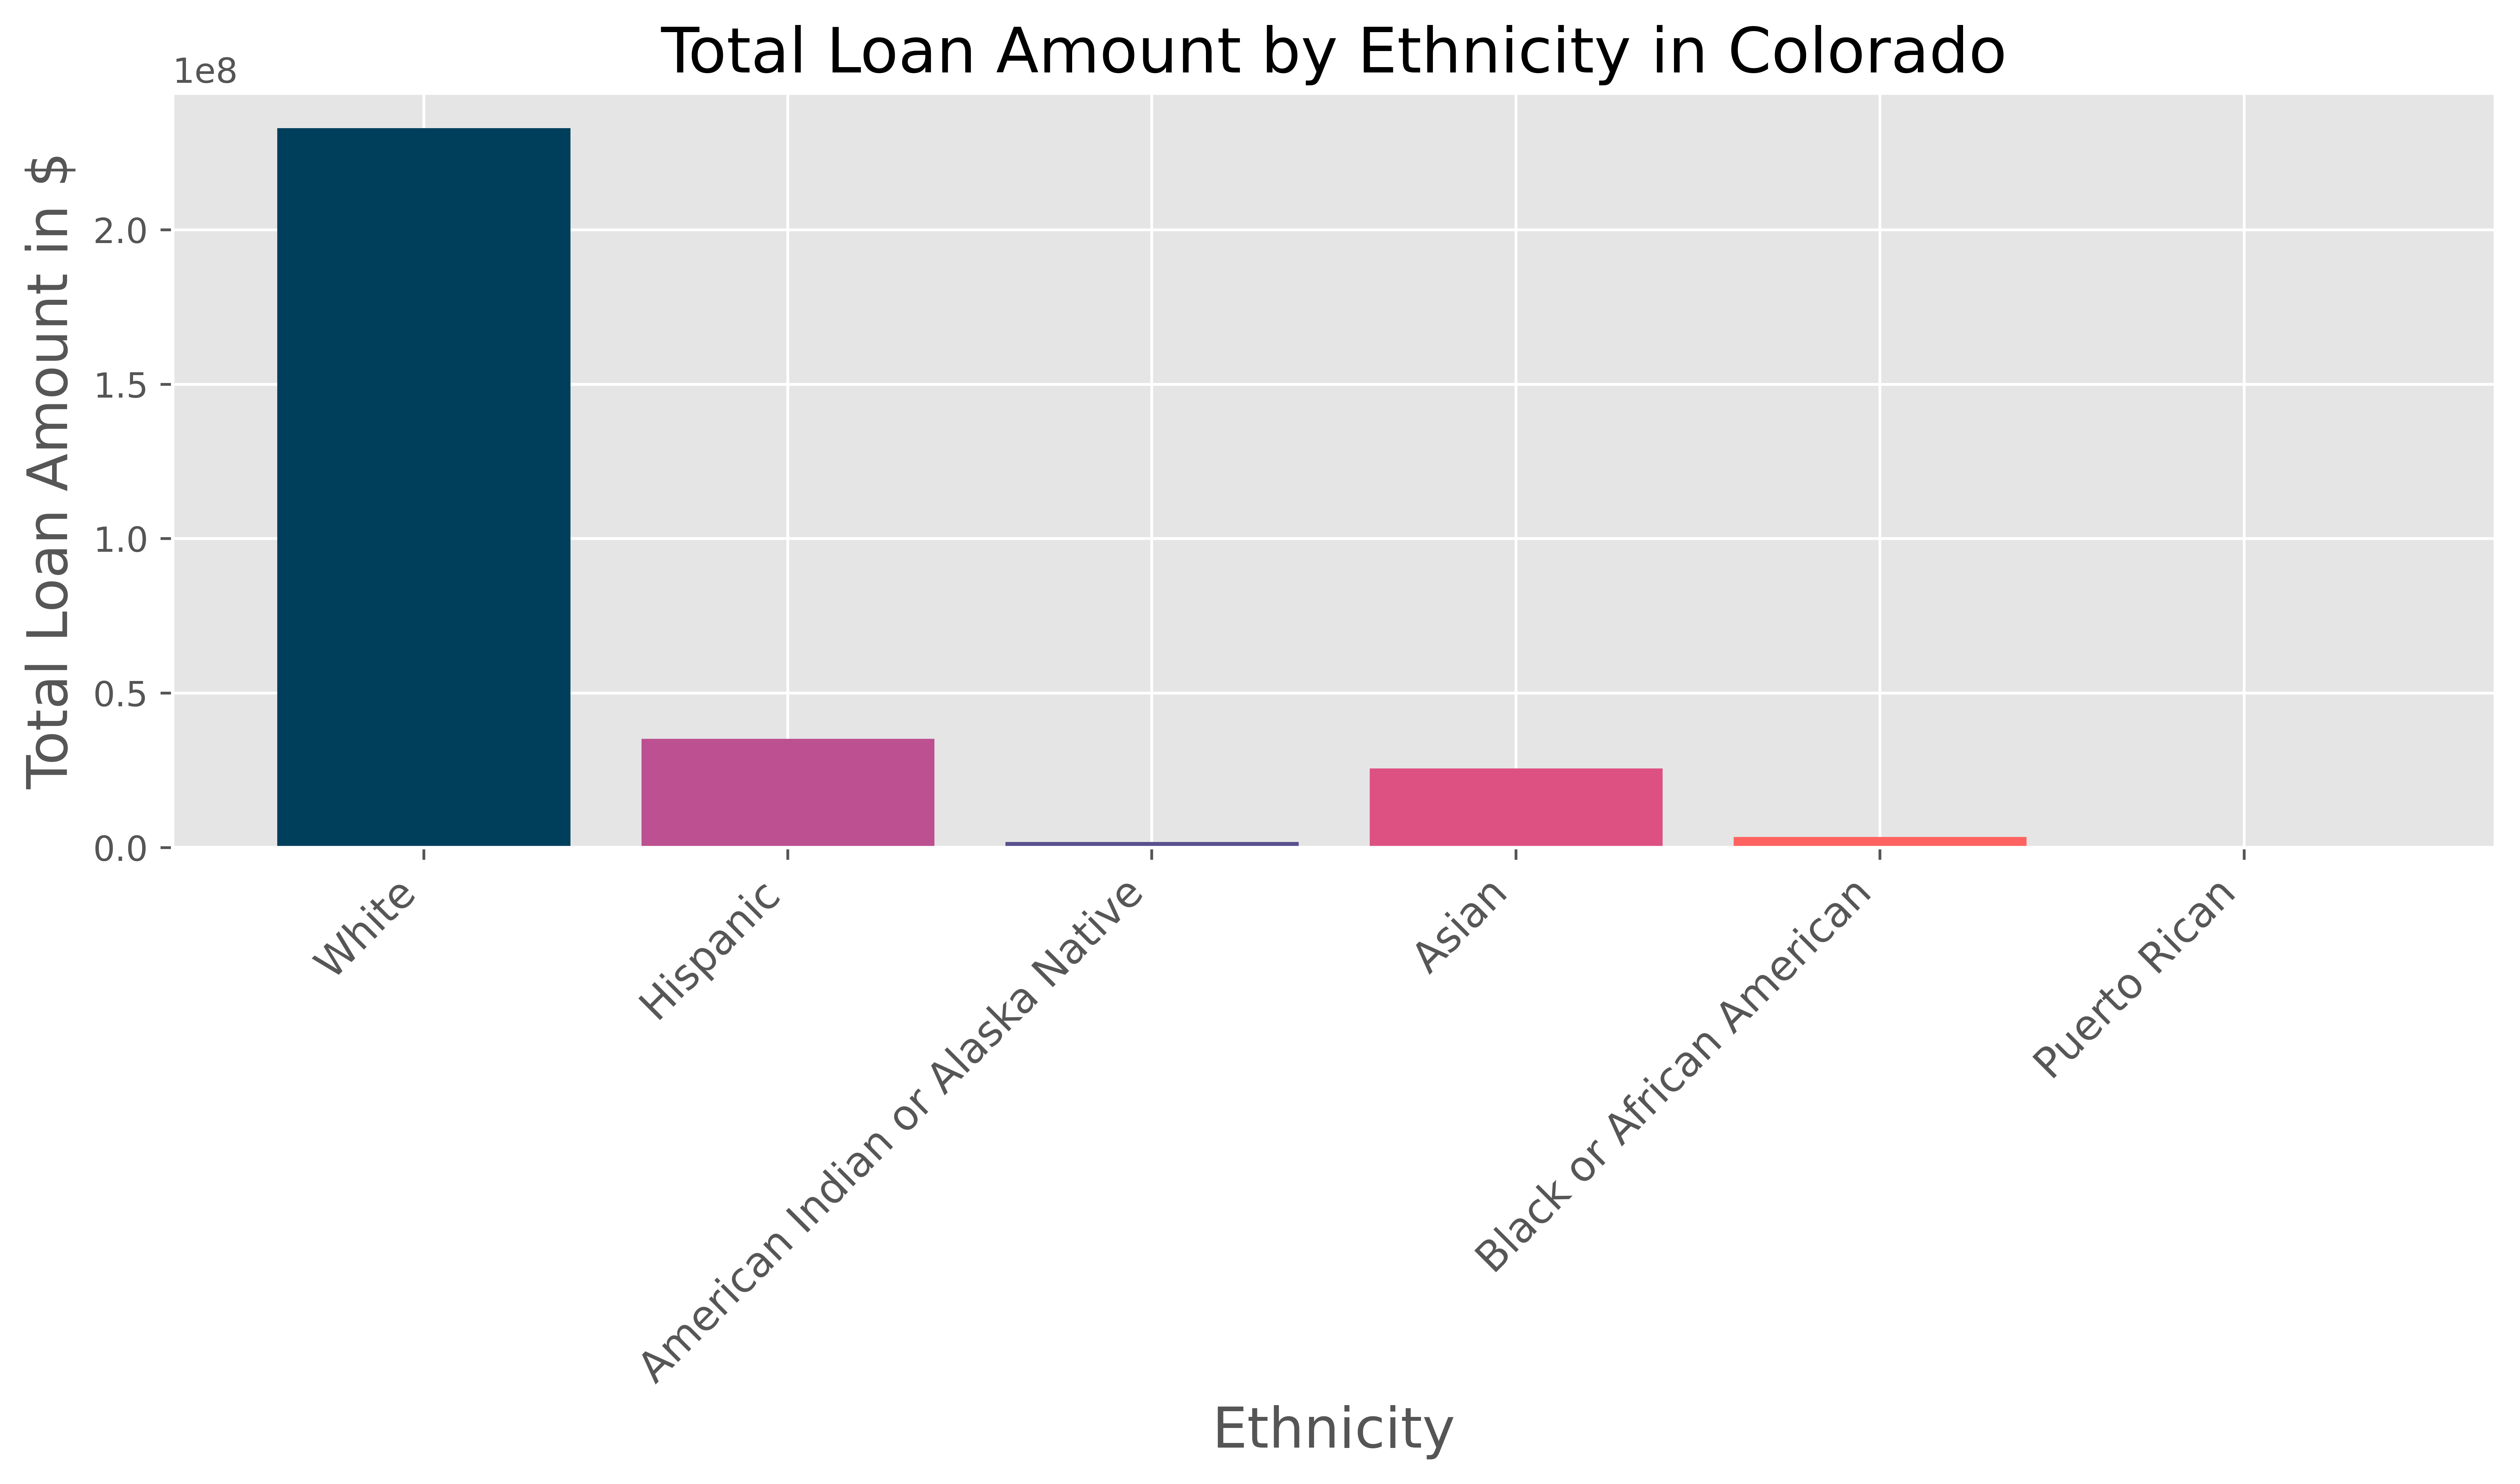

In [53]:
def total_loan_by_ethnicity(ethnicities, ethnicity_dfs):
    '''
    Computes average loan amount for each dataframe in inputted list.

    Returns: Dictionary of averages for each ethnicity in the form of ethnicity:average
    '''
    total_loan = {eth:df['LoanAmount'].sum() for eth, df in zip(ethnicities, ethnicity_dfs)}
    return total_loan
ethnicity_total_loan = total_loan_by_ethnicity(ethnicities, ethnicity_dfs)
def graph_total_loan_ethnicity(ethnicity_total_loan, chart_colors, save_loc):
    '''
    Graphs the total Loan Amount by Ethnicity

    Returns: None
    '''
    fig, ax = plt.subplots(1, figsize=(12,4), dpi=700)
    keys = ethnicity_total_loan.keys()
    totals = ethnicity_total_loan.values()
    bar = ax.bar(keys, totals)
    for i in range(len(ethnicity_total_loan)):
        bar[i].set_color(chart_colors[i])
    plt.xticks(rotation=45, fontsize=12, horizontalalignment='right')
    #ax.set_yscale('log')
    ax.set_xlabel('Ethnicity', fontsize= 16)
    ax.set_ylabel('Total Loan Amount in $', fontsize= 16)
    ax.set_title('Total Loan Amount by Ethnicity in Colorado', fontsize=18)
    plt.savefig(save_loc, bbox_inches='tight')

graph_total_loan_ethnicity(ethnicity_total_loan, chart_colors, '../images/total_loan_ethnicity_nologscale.png')

In [65]:
#demographics by county
top_counties_loans= ['Denver County', 'El Paso County', 'Jefferson County','Arapahoe County','Larimer County','Adams County','Douglas County','Weld County']
county_rows = [demographics_18[demographics_18['CTYNAME'] == x] for x in top_counties_loans]

def top_county_demographics(county_rows, demographic_eth_cols):
    '''
    Number of people for each Ethnicity group, sorts by top 8.

    Returns: Dictionary where Keys are the Ethnicities and values are a dataframe of top 5
    counties and number of people.
    '''
    demographics_by_county ={'NH Whites':[], 'Hispanic':[], 'NH Asian':[],'NH Am Indian/Native':[],'NH Afr Am':[]}
    for row in county_rows:
        for eth in demographic_eth_cols:
            demographics_by_county[eth].append([str(row['CTYNAME'].values[0]), int(row['NH Whites'].values)])
    
    demo_final_dict = demographics_by_county.copy()
    for k,v in demographics_by_county.items():
        demographic_df = pd.DataFrame(v)
        demo_final_dict[k]=demographic_df
    return demo_final_dict          
    

#top county bar chart
def graph_top_county_demographics(county_demographics, chart_colors, saveloc):
    counties = pd.DataFrame(county_demographics, index=[0])
    counties.fillna(0, inplace=True)
    counties['total'] = counties['White'] + counties['American Indian or Alaska Native'] + counties['Asian'] + counties['Black or African American']+ counties['Other'] + counties['Hispanic']
    counties = pd.DataFrame(counties).sort_values('total')    
    counties.drop('total', axis=1,inplace=True)
    
    
    ax = counties.plot(kind='barh', stacked=True, color=chart_colors,figsize=(10,6))
    plt.yticks(fontsize = 16)
    ax.set_xlabel('Number of People', fontsize=17)
    ax.set_title('Demographics of Top 8 Counties for Loans', fontsize=18)
    plt.savefig(saveloc, bbox_inches='tight')
    
county_demographics = top_county_demographics(county_rows, demographic_eth_cols)



In [66]:
graph_top_county_demographics(county_demographics, chart_colors, '../images/demographics_top_counties.png')

TypeError: 'int' object is not iterable